In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import xlrd
import os
import sys
from sklearn.utils import check_random_state
#print(os.getcwd())

DATA_FILE = './data/fire_theft.xls'
#print(DATA_FILE)
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1,sheet.nrows)])
num_samples = sheet.nrows - 1
print(data.shape)




(42, 2)


In [2]:
num_epochs = 50

In [3]:
W = tf.Variable(0.0, name="Weights")
b = tf.Variable(0.0, name="bias")


In [4]:
def inputs():
    """
    Defining the place_holders
    :return:
            Returning the data and label place holders
    """
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name="Y")
    return X,Y

In [5]:
def inference(X):
    """
    Forward passing the X.
    :param X: The input.
    :return: X*W+b.
    """
    return X * W + b

In [6]:
def loss(X,Y):
    """
    compute the loss by comparing the predicted value to the actual label.
    :param X:The input.
    :param Y:The label.
    :return: The loss over the samples.
    """
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))/(2*data.shape[0])

In [7]:
def train(loss):
    learning_rate = 0.0001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    X, Y = inputs()
    train_loss = loss(X, Y)
    train_op = train(train_loss)

    for epoch_num in range(num_epochs):
        loss_value, _ = sess.run([train_loss, train_op], feed_dict={X: data[:,0], Y:data[:,1]})
        print('epoch %s, loss=%f' %(epoch_num+1, loss_value))
        wcoeff, bias = sess.run([W,b])

epoch 1, loss=825.833374
epoch 2, loss=796.161316
epoch 3, loss=767.971252
epoch 4, loss=741.189392
epoch 5, loss=715.745300
epoch 6, loss=691.572205
epoch 7, loss=668.606384
epoch 8, loss=646.787842
epoch 9, loss=626.059082
epoch 10, loss=606.365601
epoch 11, loss=587.655823
epoch 12, loss=569.880615
epoch 13, loss=552.993103
epoch 14, loss=536.949158
epoch 15, loss=521.706482
epoch 16, loss=507.225128
epoch 17, loss=493.466980
epoch 18, loss=480.396088
epoch 19, loss=467.977905
epoch 20, loss=456.179932
epoch 21, loss=444.971191
epoch 22, loss=434.322235
epoch 23, loss=424.204987
epoch 24, loss=414.593140
epoch 25, loss=405.461182
epoch 26, loss=396.785309
epoch 27, loss=388.542603
epoch 28, loss=380.711517
epoch 29, loss=373.271454
epoch 30, loss=366.203003
epoch 31, loss=359.487396
epoch 32, loss=353.107056
epoch 33, loss=347.045349
epoch 34, loss=341.286285
epoch 35, loss=335.814667
epoch 36, loss=330.616272
epoch 37, loss=325.677429
epoch 38, loss=320.985046
epoch 39, loss=316.52

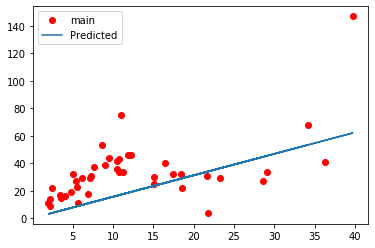

In [10]:
Input_values = data[:,0]
Labels = data[:,1]
Prediction_values = data[:,0] * wcoeff + bias

# uncomment if plotting is desired!
plt.plot(Input_values, Labels, 'ro', label='main')
plt.plot(Input_values, Prediction_values, label='Predicted')

# Saving the result.
plt.legend()
plt.show()
plt.close()